## Crypto Price Chart

In [1]:
# %%capture
# !pip install yfinance
# !pip install mpld3


In [2]:
# activate tab completion so I won't shy away from descriptive vars
%config IPCompleter.use_jedi = False
# supress warnings
import warnings
warnings.filterwarnings('ignore')
# Allow for multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import the modules that should be part of core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# allow for inline printing without plt.show
%matplotlib inline
from IPython.display import display, HTML, Markdown, Video, Javascript, Image
# Allow for multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import yfinance as yf
import mpld3
mpld3.enable_notebook()

In [3]:
xmode minimal

Exception reporting mode: Minimal


In [4]:

period='max'
ticker_list = ['ETH-USD','BTC-USD','TLT', 'GLD', 'SPY']
interval = '1d'


In [5]:
#You can use this class for querying one asset. I will use this to plot just ETH by price.
eth = yf.Ticker("ETH-USD")
eth_prices_df = eth.history(period='max', interval='1d')[['Close']]
eth_prices_df.head()

,Close
Date,
2017-11-09 00:00:00+00:00,320.884003
2017-11-10 00:00:00+00:00,299.252991
2017-11-11 00:00:00+00:00,314.681000
2017-11-12 00:00:00+00:00,307.907990
2017-11-13 00:00:00+00:00,316.716003


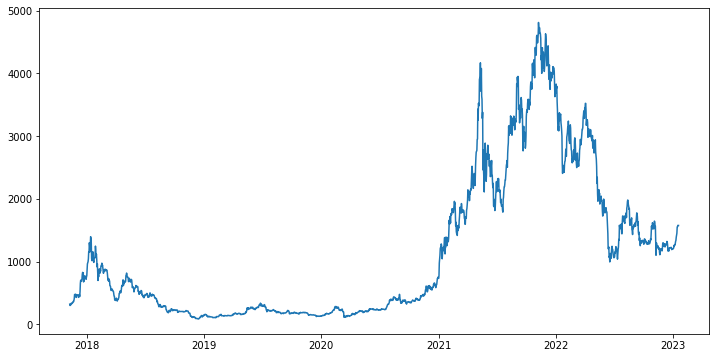

In [6]:

fig, axs = plt.subplots(figsize=(12,6));
axs.plot(eth_prices_df.index, eth_prices_df.Close);

In [7]:
#Now let's use the multiple ticker functionality of yfinance. 
#Since BTC has driven the prices and has a longer history, it is worth looking at.
crypto_df = yf.download(ticker_list, period='max')['Adj Close']
crypto_df.head()


[*********************100%***********************]  5 of 5 completed


,BTC-USD,ETH-USD,GLD,SPY,TLT
Date,,,,,
1993-01-29 05:00:00+00:00,NaN,NaN,NaN,25.218227,NaN
1993-02-01 05:00:00+00:00,NaN,NaN,NaN,25.397593,NaN
1993-02-02 05:00:00+00:00,NaN,NaN,NaN,25.451393,NaN
1993-02-03 05:00:00+00:00,NaN,NaN,NaN,25.720440,NaN
1993-02-04 05:00:00+00:00,NaN,NaN,NaN,25.828039,NaN


In [8]:
crypto_df.fillna(method='ffill', inplace=True)
crypto_returns_df = 100 * (crypto_df.loc['2018-01-01':].pct_change()+1).cumprod()
crypto_returns_df.sample(10)

,BTC-USD,ETH-USD,GLD,SPY,TLT
Date,,,,,
2018-11-18 00:00:00+00:00,41.176376,22.917112,93.505864,103.915939,92.439710
2020-09-17 04:00:00+00:00,80.170094,50.349286,147.966037,132.014313,137.426521
2021-07-21 00:00:00+00:00,235.119153,257.683821,136.991506,171.967852,127.163791
2021-02-24 00:00:00+00:00,363.949648,210.521536,136.773144,153.582807,119.375077
2018-05-19 00:00:00+00:00,60.387045,90.149246,98.997171,102.082272,93.175546
2022-10-27 00:00:00+00:00,148.535832,195.999810,125.337642,155.205559,83.709689
2018-09-28 04:00:00+00:00,48.649282,28.784648,91.192884,110.365842,94.072276
2018-01-29 00:00:00+00:00,82.713882,153.028379,103.574610,107.389639,97.422346
2022-05-01 00:00:00+00:00,281.676282,365.985773,143.073192,165.983933,102.448086


In [10]:
# fig, ax = plt.subplots((1,2), figsize=(8,8));
# ax.plot(crypto_returns_df.index, crypto_returns_df["ETH-USD"], label='ETH');
# ax.plot(crypto_returns_df.index, crypto_returns_df["BTC-USD"], label='BTC');
# ax.plot(crypto_returns_df.index, crypto_returns_df["GLD"], label='GLD');
# ax.plot(crypto_returns_df.index, crypto_returns_df["TLT"], label='TLT');
# ax.plot(crypto_returns_df.index, crypto_returns_df["SPY"], label='SPY');
# plt.legend();


In [11]:
monthly_df = crypto_df.resample('1M').ffill()
monthly_df

,BTC-USD,ETH-USD,GLD,SPY,TLT
Date,,,,,
1993-01-31 00:00:00+00:00,NaN,NaN,NaN,25.218227,NaN
1993-02-28 00:00:00+00:00,NaN,NaN,NaN,25.487263,NaN
1993-03-31 00:00:00+00:00,NaN,NaN,NaN,26.076189,NaN
1993-04-30 00:00:00+00:00,NaN,NaN,NaN,25.355349,NaN
1993-05-31 00:00:00+00:00,NaN,NaN,NaN,26.076189,NaN
...,...,...,...,...,...
2022-09-30 00:00:00+00:00,19431.789062,1327.978638,154.660004,361.131683,102.794571
2022-10-31 00:00:00+00:00,20495.773438,1572.714478,153.160004,387.241760,96.100494
2022-11-30 00:00:00+00:00,17168.566406,1295.688599,162.729996,393.423401,101.492279


In [12]:
def fig_html_save(fig, file_name):
    html_str = mpld3.fig_to_html(fig)
    with open (file_name,  'w') as f:
        f.write(html_str)
    
    

In [13]:
def plot_returns(df, ax):
    for ticker in df.columns:
        ax.plot(df.index, df[ticker], label=ticker);
        

<BarContainer object of 361 artists>

Text(0.5, 1.0, 'Ethereum Monthly Closing Prices 2018 - present')

Text(0, 0.5, 'Ethereum price (USD)')

Text(0.5, 0, 'Figure 1')

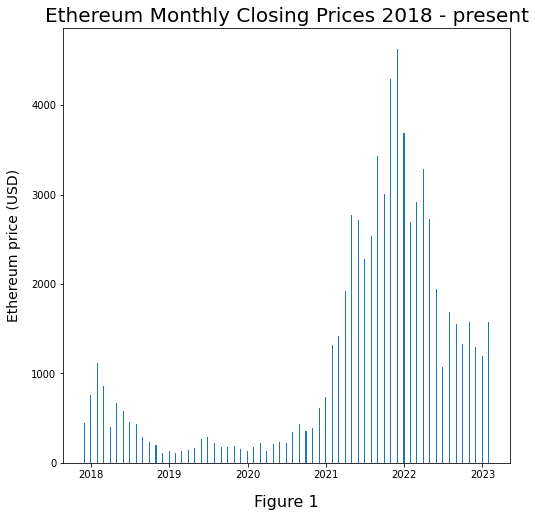

In [14]:
fig1, ax = plt.subplots(figsize=(8,8))
ax.bar(monthly_df.index, monthly_df['ETH-USD'], width=5);
ax.set_title("Ethereum Monthly Closing Prices 2018 - present", fontsize=20);
ax.set_ylabel("Ethereum price (USD)", labelpad=10, fontsize=14);
ax.set_xlabel("Figure 1", fontsize=16, labelpad=15);
fig_html_save(fig1, 'figure1.html')
plt.savefig('figure1.png')


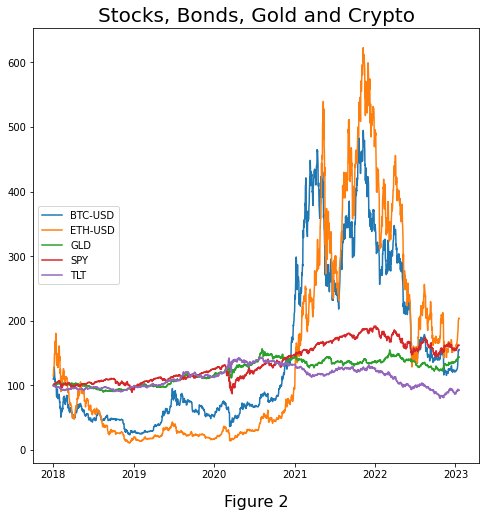

In [21]:
fig2, ax = plt.subplots(figsize=(8,8))
plot_returns(crypto_returns_df, ax)
ax.set_title("Stocks, Bonds, Gold and Crypto", fontsize=20);
ax.set_xlabel("Figure 2",fontsize=16, labelpad=15)
plt.legend(loc="center left");
fig_html_save(fig2, 'figure2.html');
plt.savefig('figure2.png');

In [18]:
pwd

'/Users/mo/crypto_returns'

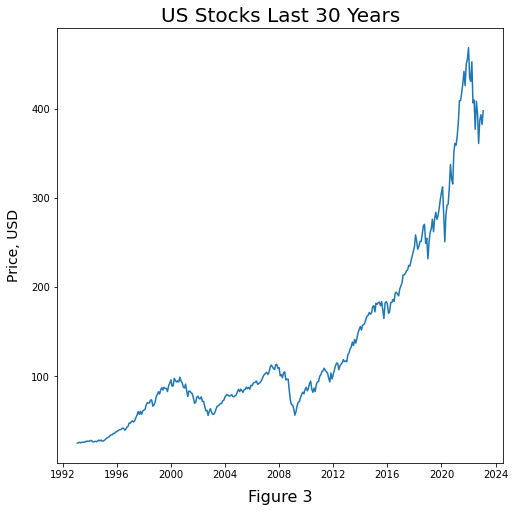

In [20]:
monthly_spy = crypto_df[["SPY"]].resample('M').ffill()
fig3, ax = plt.subplots(figsize=(8,8));
ax.plot(monthly_spy.index, monthly_spy.SPY);
ax.set_title("US Stocks Last 30 Years", fontsize=20);
ax.set_ylabel("Price, USD", fontsize=14, labelpad=10);
ax.set_xlabel("Figure 3", fontsize=16, labelpad=10);
fig_html_save(fig3, 'figure3.html');
plt.savefig('figure3.png');
